In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go




from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/training_cleaned.csv')
df.drop(df.columns[0], axis=1, inplace=True)

In [0]:
df_clus = df[['AAAP', 'AACP', 'ARAP', 'ARCP', 'CAAP', 'CACP', 
             'CRAP', 'CRCP', 'VehBCost', 'WarrantyCost', 'VehOdo']]
df_clus = df_clus[0:20000]

In [0]:
df_clus.corr()

,AAAP,AACP,ARAP,ARCP,CAAP,CACP,CRAP,CRCP,VehBCost,WarrantyCost,VehOdo
AAAP,1.000000,0.989863,0.903321,0.903262,0.955706,0.949258,0.886580,0.885185,0.814355,-0.059012,-0.027246
AACP,0.989863,1.000000,0.893870,0.910603,0.943697,0.951775,0.877187,0.887684,0.811178,-0.029230,0.015304
ARAP,0.903321,0.893870,1.000000,0.989420,0.867251,0.863108,0.934994,0.926273,0.775587,-0.060543,0.022686
ARCP,0.903262,0.910603,0.989420,1.000000,0.864964,0.872470,0.927409,0.929983,0.780196,-0.033476,0.056172
CAAP,0.955706,0.943697,0.867251,0.864964,1.000000,0.989991,0.910321,0.907384,0.788065,-0.060539,-0.039213
CACP,0.949258,0.951775,0.863108,0.872470,0.989991,1.000000,0.902398,0.916078,0.786044,-0.032182,0.001836
CRAP,0.886580,0.877187,0.934994,0.927409,0.910321,0.902398,1.000000,0.988987,0.770921,-0.060701,0.003939
CRCP,0.885185,0.887684,0.926273,0.929983,0.907384,0.916078,0.988987,1.000000,0.773118,-0.033060,0.037056
VehBCost,0.814355,0.811178,0.775587,0.780196,0.788065,0.786044,0.770921,0.773118,1.000000,-0.039219,-0.075337
WarrantyCost,-0.059012,-0.029230,-0.060543,-0.033476,-0.060539,-0.032182,-0.060701,-0.033060,-0.039219,1.000000,0.402873


In [0]:
df_1 = df_clus[['AAAP', 'ARAP', 'VehBCost']]
df_2 = df_clus[['WarrantyCost', 'VehOdo', 'VehBCost']]
df_3 = df_clus[['AAAP', 'VehOdo', 'VehBCost']]

In [0]:
from sklearn.cluster import DBSCAN

In [0]:
to_db_scan = [df_1, df_2, df_3]
min_samp = []
epsilon = []
scaled_df = []
scaler = StandardScaler()

epsilon = []
#for i in range(8, 12):
#  min_samp.append(math.pow(2, i))
p = 0.1
for i in range(0, 100):
  epsilon.append(p)
  p+=0.001

for e in to_db_scan:
  scaled_df.append(scaler.fit_transform(e.values))

# List of good clusters:

- df_3: $<\epsilon , mp> = <0.3 \sim 0.4, 256>$
- df_1: $<\epsilon , mp> = <0.18 \sim 0.28, 256>$


In [0]:
plot_df_idx = 0
plot_eps = 0.35
plot_mp = 256
to_plot = to_db_scan[plot_df_idx]
columns = []
for c in to_plot.columns:
  columns.append(c)
x = columns[0]
y = columns[1]
z = columns[2]

res = DBSCAN(eps=plot_eps, min_samples=plot_mp).fit(scaled_df[plot_df_idx])
print(np.unique(res.labels_, return_counts=True))

(array([-1,  0]), array([ 2868, 17132]))


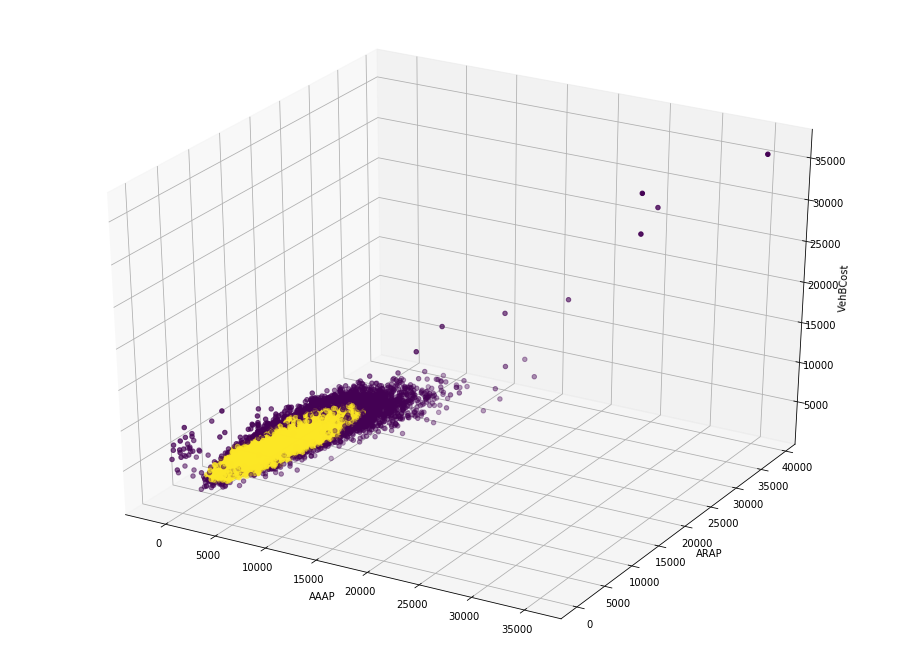

In [0]:
fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(to_plot[x],
           to_plot[y],
           to_plot[z],
           c=res.labels_, marker='o')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

In [0]:
fig = go.Figure(data=[go.Scatter3d(
    x=to_plot[x],
    y=to_plot[y],
    z=to_plot[z],
    mode='markers',
    marker=dict(
        size=2,
        color=res.labels_,                # set color to an array/list of desired values
        #colorscale='Viridis',   # choose a colorscale
        opacity=1
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0),
                 scene = dict(
                     xaxis_title= x,
                     yaxis_title= y,
                     zaxis_title= z)
                 )
fig.show()

In [0]:
results = {}

appl = [scaled_df[0]]

for i, e in enumerate(appl):
  results[str(i)] = []

for i, df in enumerate(appl):
  for j, ms in enumerate(epsilon):
    results[str(i)].append(DBSCAN(eps=epsilon[j], min_samples=50).fit(df))
    print("end ", epsilon[j], " at iteration ", j)

end  0.1  at iteration  0
end  0.101  at iteration  1
end  0.10200000000000001  at iteration  2
end  0.10300000000000001  at iteration  3
end  0.10400000000000001  at iteration  4
end  0.10500000000000001  at iteration  5
end  0.10600000000000001  at iteration  6
end  0.10700000000000001  at iteration  7
end  0.10800000000000001  at iteration  8
end  0.10900000000000001  at iteration  9
end  0.11000000000000001  at iteration  10
end  0.11100000000000002  at iteration  11
end  0.11200000000000002  at iteration  12
end  0.11300000000000002  at iteration  13
end  0.11400000000000002  at iteration  14
end  0.11500000000000002  at iteration  15
end  0.11600000000000002  at iteration  16
end  0.11700000000000002  at iteration  17
end  0.11800000000000002  at iteration  18
end  0.11900000000000002  at iteration  19
end  0.12000000000000002  at iteration  20
end  0.12100000000000002  at iteration  21
end  0.12200000000000003  at iteration  22
end  0.12300000000000003  at iteration  23
end  0.1

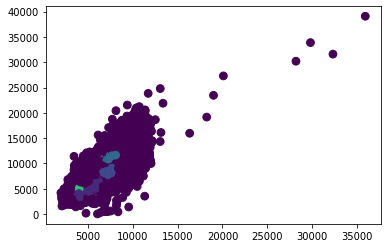

In [0]:
plt.scatter(to_db_scan[0]['VehBCost'], to_db_scan[0]['ARAP'], 
            c=results['0'][0].labels_, s=60)

In [0]:
for i, df in enumerate(appl):
  print("data frame ", str(i), ":")
  for j, ms in enumerate(epsilon):
    print(np.unique(results[str(i)][j].labels_, return_counts=True), " for epsilon = " , ms)
  print("========================================")

data frame  0 :
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8]), array([13894,  2835,  1873,   930,    76,    93,    60,    51,   116,
          72]))  for epsilon =  0.1
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8]), array([13711,  2893,  1928,   957,    86,   125,   103,    67,    52,
          78]))  for epsilon =  0.101
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9]), array([13456,  2914,  1953,   990,    83,   157,   154,    84,    75,
          51,    83]))  for epsilon =  0.10200000000000001
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9]), array([13330,  2963,  1961,  1029,    90,   160,   162,    88,    80,
          52,    85]))  for epsilon =  0.10300000000000001
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]), array([13096,  3002,  1971,  1050,   102,   179,   159,    87,    84,
          80,   100,    40,    50]))  for epsilon =  0.10400000000000001
(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16]), array([127

In [0]:
filtered = []

for i, df in enumerate(appl):
  for j, ms in enumerate(epsilon):
   labels, count = np.unique(results[str(i)][j].labels_, return_counts=True)
   if len(count) > 2: # len 0 => solo noise points, len => un solo cluster e noise points
    good_cluster_count = 0
    for punt, e in enumerate(labels):
      if e != -1 and count[punt] > 200:
        good_cluster_count += 1
    if good_cluster_count > 1 and labels[0] == -1:
      filtered.append({
          'df': i,
          'eps': epsilon[j], 
          'min_samp': 64,
          'labels': labels,
          'count': count
      })

print("========================================")
print("Found ", len(filtered), " potentially good clustering results")
print("========================================")
for e in filtered:
  print("data frame ", e['df'], " (<eps, min_samp> = <", e['eps'], ",", e['min_samp'], ">) -> ", e['count'])

Found  100  potentially good clustering results
data frame  0  (<eps, min_samp> = < 0.1 , 64 >) ->  [13894  2835  1873   930    76    93    60    51   116    72]
data frame  0  (<eps, min_samp> = < 0.101 , 64 >) ->  [13711  2893  1928   957    86   125   103    67    52    78]
data frame  0  (<eps, min_samp> = < 0.10200000000000001 , 64 >) ->  [13456  2914  1953   990    83   157   154    84    75    51    83]
data frame  0  (<eps, min_samp> = < 0.10300000000000001 , 64 >) ->  [13330  2963  1961  1029    90   160   162    88    80    52    85]
data frame  0  (<eps, min_samp> = < 0.10400000000000001 , 64 >) ->  [13096  3002  1971  1050   102   179   159    87    84    80   100    40
    50]
data frame  0  (<eps, min_samp> = < 0.10500000000000001 , 64 >) ->  [12702  3045   126  1985  1093   186   166    90    41    77   103    83
    85    25    51    52    40    50]
data frame  0  (<eps, min_samp> = < 0.10600000000000001 , 64 >) ->  [12489  3130   126  1991  1131    44   127   189   253

**Knee Method**

In [0]:
from scipy.spatial.distance import pdist, squareform
from itertools import combinations

In [0]:
def square_to_condensed(i, j, n):
    assert i != j, "no diagonal elements in condensed matrix"
    if i < j:
        i, j = j, i
    return n*j - j*(j+1)/2 + i - 1 - j

Dobbiamo usare quella condensed perchè altrimenti non entra in memoria :(

In [0]:
# SQUAREFORM
to_knee_square = []

for df_i, df in enumerate(to_knee_square):
  dist = []
  dist = squareform(pdist(df, 'euclidean'))
  kth_distances = []
  for d in dist:
    index_kth_distance = np.argsort(d)[5]
    kth_distances.append(d[index_kth_distance])
  plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
  plt.ylabel('dist from %sth neighbor' % k, fontsize=18)
  plt.xlabel('sorted distances', fontsize=18)
  plt.tick_params(axis='both', which='major', labelsize=22)
  plt.show()



In [0]:
to_knee = []
# to_knee = appl

for df_i, df in enumerate(to_knee):
  dist = []
  dist = (pdist(df, metric='euclidean'))  #distance vector (condensed matrix)
  kth_distances = []
  n = len(df_1)
  for i in range (0, n):
    d = []
    for j in range (0, n):
      if i != j:
        idx = round(square_to_condensed(i, j, n))
        d.append(dist[idx])
    index_kth_distance = np.argsort(d)[5]
    kth_distances.append(d[index_kth_distance])
    if i % 1000 == 0:
      print("data frame ", df_i, ": ", i, " out of ", n)

  plt.clf()
  xLab = "Points sorted according to distance from " + str(
      5) + "th nearest neighbour"
  yLab = str(5) + "th nearest neighbour distance"
  plt.xlabel(xLab)
  plt.ylabel(yLab)
  plt.yticks(np.arange(0, 2, 0.1))
  ax = plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
  plt.grid(color='black', linestyle='-', linewidth=1)
  plt.show()

In [0]:
silu = {}
to_silu = []
#to_silu = appl

for idx, e in enumerate(to_silu):
  silu[str(idx)] = []

for idx, e in enumerate(to_silu):
  for i, p in enumerate(min_samp):
    #silu[str(idx)].append(silhouette_score(e, results[str(idx)][i].labels_, metric = 'euclidean'))
    silu[str(idx)].append(silhouette_score(e, results[str(idx)][i].labels_))
  print("end data frame ", idx)